In [1]:
import pandas as pd

panel = pd.read_parquet("../data/processed/provider_panel_scored.parquet")
panel.shape

(10461, 54)

In [3]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
SRC_DIR = str(PROJECT_ROOT / "src" / "healthcare_signals")

if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

from risk_scoring import compute_risk_score

# Compute unified provider risk score
panel = compute_risk_score(panel)

panel[['provider_id', 'provider_risk_score']].head()

,provider_id,provider_risk_score
0,0557475616,0.972613
1,3762822013,0.945990
2,0557475616,0.857088
3,2457354102,0.945990
4,3762822013,0.822484


In [4]:
# Rank providers by highest risk
panel['risk_rank'] = panel['provider_risk_score'].rank(method='dense', ascending=False)

# Extract top 10 highest-risk providers
top_risk = panel.sort_values('provider_risk_score', ascending=False).head(10)

top_risk[['provider_id', 'provider_risk_score', 'risk_rank']]

,provider_id,provider_risk_score,risk_rank
14,0941734431,1.000000,1.0
4370,0941734431,0.999904,2.0
742,2866295111,0.999809,3.0
1446,0888901330,0.999713,4.0
4837,3265059745,0.999618,5.0
6526,5111491524,0.999522,6.0
501,6502930399,0.999426,7.0
1085,2866295111,0.999331,8.0
5121,0941734431,0.999187,9.0
4113,3265059745,0.999187,9.0


Plotting Provider 0941734431 — Risk Score: 1.000


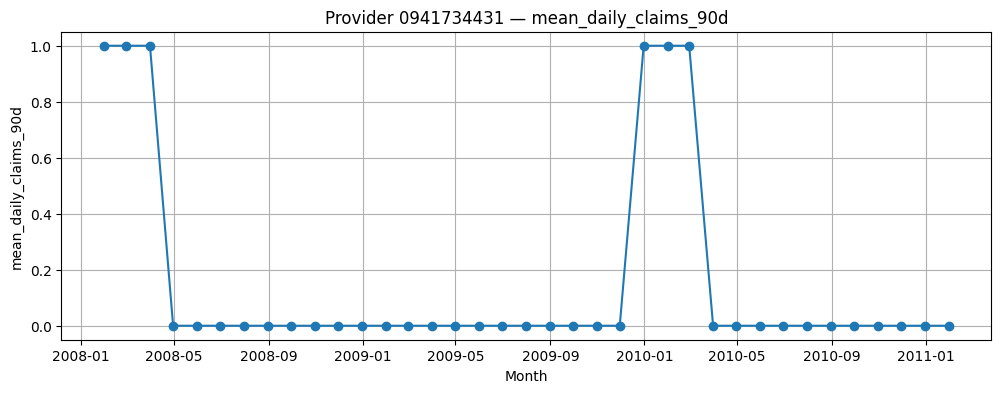

Plotting Provider 0941734431 — Risk Score: 1.000


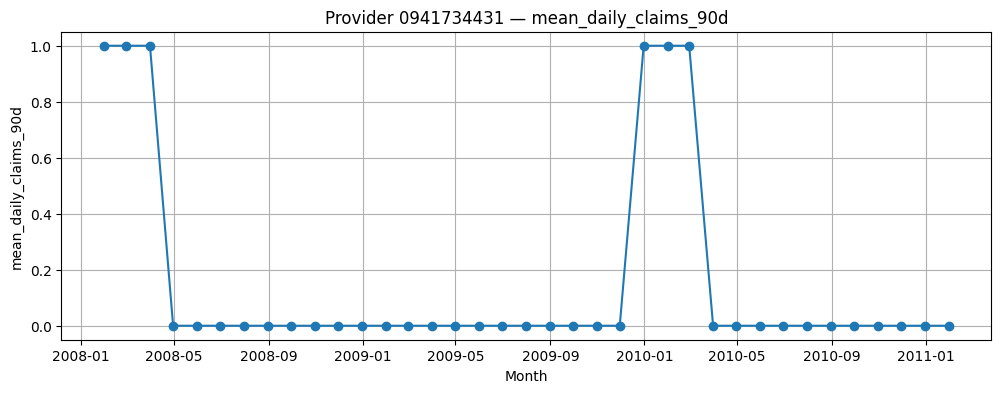

Plotting Provider 2866295111 — Risk Score: 1.000


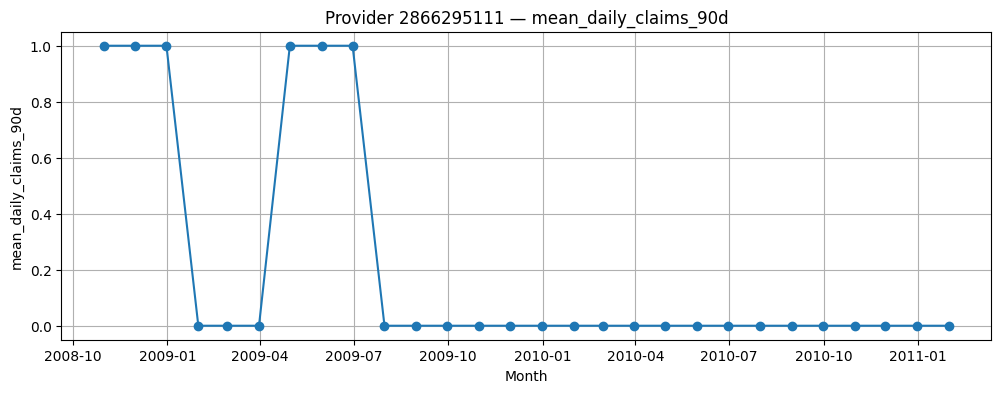

Plotting Provider 0888901330 — Risk Score: 1.000


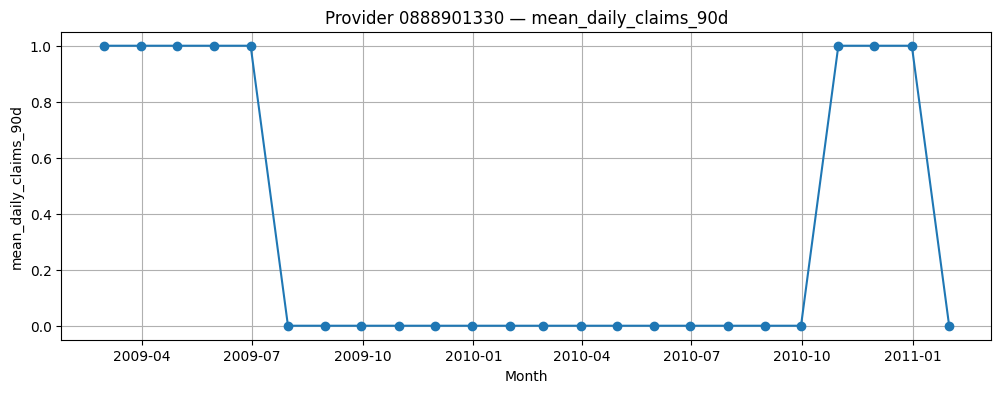

Plotting Provider 3265059745 — Risk Score: 1.000


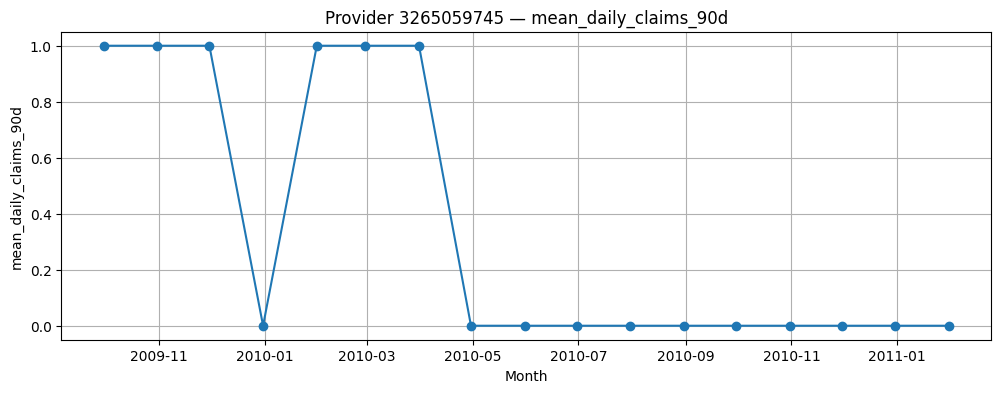

Plotting Provider 5111491524 — Risk Score: 1.000


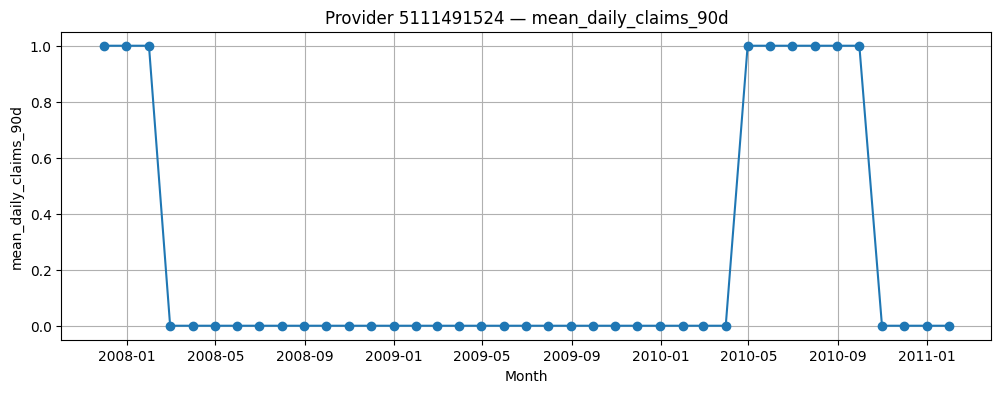

Plotting Provider 6502930399 — Risk Score: 0.999


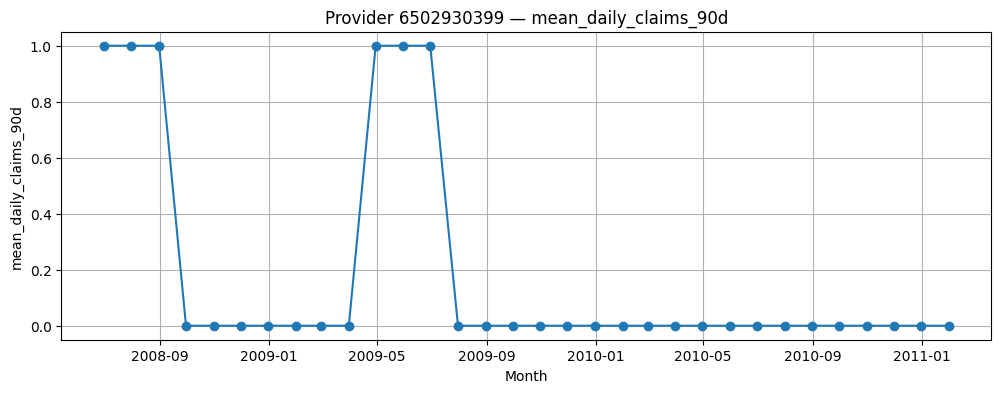

Plotting Provider 2866295111 — Risk Score: 1.000


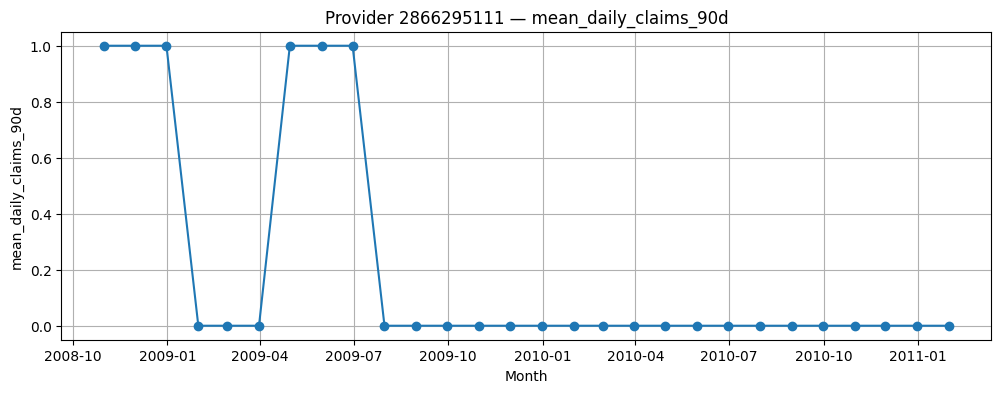

Plotting Provider 0941734431 — Risk Score: 1.000


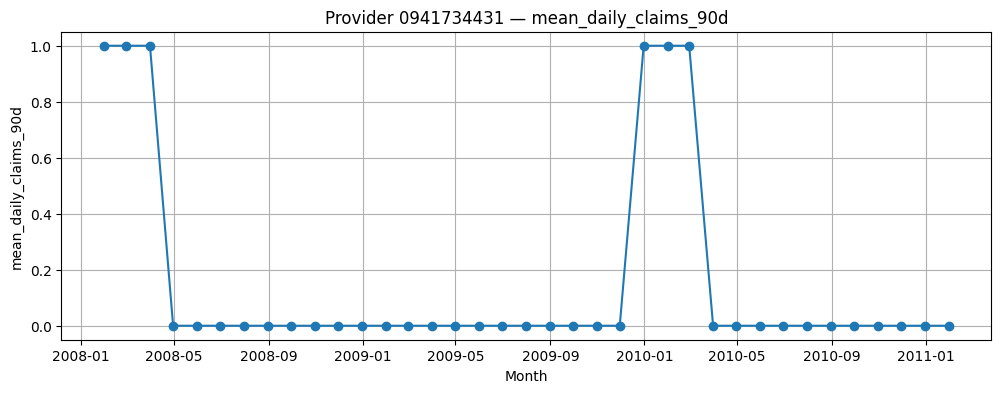

Plotting Provider 3265059745 — Risk Score: 1.000


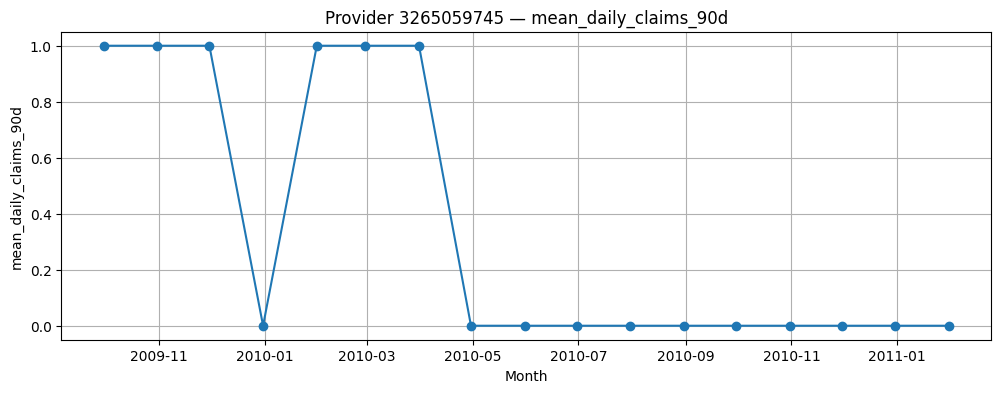

In [5]:
from healthcare_signals.plotting_utils import plot_provider_trend

TOP_N = 10

for pid in top_risk['provider_id'].tolist():
    df_pid = (
        panel[panel.provider_id == pid]
        .rename(columns={"as_of_date": "snapshot_dt"})
        .sort_values("snapshot_dt")
    )

    print(f"Plotting Provider {pid} — Risk Score: {df_pid['provider_risk_score'].max():.3f}")
    plot_provider_trend(df_pid, value_col="mean_daily_claims_90d")

In [6]:
# Save risk-scored provider panel
output_path = "../data/processed/provider_panel_risk_scored.parquet"

panel.to_parquet(output_path, index=False)

output_path

'../data/processed/provider_panel_risk_scored.parquet'

In [9]:
import pandas as pd

df = pd.read_parquet("../data/processed/provider_panel_risk_scored.parquet")
df.to_csv("../data/processed/provider_panel_risk_scored.csv", index=False)
